## Linear Regression and RANSAC

In [1]:
# Load the modules we need
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
# need logarithm and random int functions
from math import log, sqrt
from random import randint

In [2]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [3]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [4]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [62]:
# This is the cell you need to replace to complete Task 2.

#instantiate y value and values alpha-delta
line_y = []
alpha, beta, gamma, delta = 0,0,0,0

#calculate values alpha-delta
for i in range(n_samples):
    alpha += (X[i][0])*(y[i])
    beta += (X[i][0])**2
    gamma += X[i][0]
    delta += y[i]
print("alpha:",alpha)
print("beta:",beta)
print("gamma:",gamma)
print("delta:",delta)

#form matrices of equation and calculate m and c
m1 = np.array([[beta, gamma],[gamma,n_samples]])
m2 = np.array([[alpha],[delta]])
m,c = np.dot(np.linalg.inv(m1),m2) 
print("m:",m[0],"\nc:",c[0])

#calculate y values for given x values using m and c
for j in range(len(line_X)):
    line_y.append((m*line_X[j])+c)
print("line_y:",line_y)

alpha: 75479.19544988453
beta: 1412.977858637936
gamma: 113.7200731182464
delta: -3205.981248354341
m: 54.17236386901523 
c: -9.366466428527001
line_y: [array([-174.38323639]), array([-120.21087252]), array([-66.03850865]), array([-11.86614478]), array([42.30621909]), array([96.47858295]), array([150.65094682]), array([204.82331069])]


In [64]:
# This is the cell you need to replace to complete Task 3.
# Robustly fit linear model with RANSAC algorithm
#ransac = linear_model.RANSACRegressor()
#ransac.fit(X, y)

line_y_ransac = []
# s = min samples to form a model (line in 2D in this case)
s = 2
# e = proportion of outliers
e = n_outliers/n_samples 
# p = confidence level in model, 99.9999% is good
p = 0.999999
# n = number of iterations, calc using formula
n = round((log(1-p))/(log(1-((1-e)**2))))
print("n:",n)
# d = distance to count in inlier threshold, chosen empirically
d = 1

# Predict data of estimated models
#line_y_ransac = ransac.predict(line_X)
#print(line_y_ransac)

#instantiate basic values
i1, i2 = 0,0
model = []
inlier_mask = []
outlier_mask = []
inliers = 0

#func: calculate m and c for line using two points
def calculateLine2D(p1,p2):
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = p2[1] - m*p2[0] 
    return m,c

#func: calculate perpendicular distance a point is from a line
def calcDistPointFromLine(line, point):
    return (abs(line[0]*point[0]-point[1]+line[1]))/(sqrt((line[0]**2)+1))

#for n interations
for i in range(n):
    #choose two random different coords for sample
    i1 = randint(0,n_samples)
    i2 = randint(0,n_samples)
    while(i1 == i2):
        i2 = randint(0,n_samples)
    
    #create a line from those two points
    createModel = calculateLine2D([X[i1],y[i1]],[X[i2],y[i2]])
    print("Model",i+1,"m:",createModel[0],"c:",createModel[1])
    
    #instantiate vars to count inliers
    tempInlier = []
    tempInliers = 0;
    #for every point 
    for point in range(n_samples):
        #if it is an inlier, count it as such
        if(point != i1 and point != i2):
            if(calcDistPointFromLine(createModel,[X[point],y[point]]) < d):
                tempInlier.append(True)
                tempInliers += 1
            else:
                tempInlier.append(False)
        else:
            tempInlier.append(True)
    #if this model has the most inliers, use it as the new model
    if(tempInliers > inliers): 
        model = createModel
        inlier_mask = tempInlier
        inliers = tempInliers

outlier_mask = np.logical_not(inlier_mask)
    
# Label the if source data is inlier or outlier
#inlier_mask = ransac.inlier_mask_
#outlier_mask = np.logical_not(inlier_mask)

for j in range(len(line_X)):
    line_y_ransac.append((model[0]*line_X[j])+model[1])
print("line_y_ransac:",line_y_ransac)

n: 6
Model 1 m: [87.7774766] c: [-5.43069224]
Model 2 m: [69.42272431] c: [-4.19932871]
Model 3 m: [90.91005652] c: [-6.20682751]
Model 4 m: [84.37970653] c: [6.45042175]
Model 5 m: [-34.75798884] c: [73.70345618]
Model 6 m: [163.86309455] c: [-37.18096227]
line_y_ransac: [array([-272.81344296]), array([-185.03596636]), array([-97.25848976]), array([-9.48101316]), array([78.29646345]), array([166.07394005]), array([253.85141665]), array([341.62889325])]


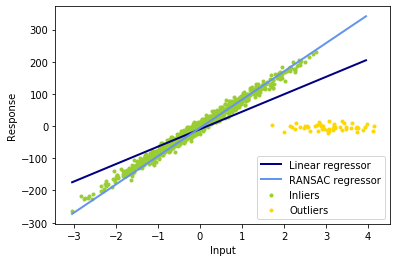

In [65]:
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

if (doing_ransac):
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()